In [4]:
from scipy.stats import unitary_group
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt

In [7]:
def bell(d):
    bell = np.zeros(d**2)
    for i in range(d):
        ket_i = np.zeros(d)
        ket_i[i] = 1
        bell += np.kron(ket_i, ket_i)
    return bell/np.sqrt(d)

def psi_i(d):
    psi = np.zeros(4*d**2)
    for j in range(2):
        ket_j = np.zeros(2)
        ket_j[j] = 1
        psi_j = np.kron(ket_j,bell(d))
        psi_j = np.kron(psi_j, ket_j)
        psi += psi_j/np.sqrt(2)
    psi = np.kron(bell(2), psi)
    psi = np.kron(psi, bell(2))
    return psi

def scrambler(d):
    u = unitary_group.rvs(4*d)
    scrambler = np.kron(np.eye(2), u)
    scrambler = np.kron(scrambler, u.conj())
    scrambler = np.kron(scrambler, np.eye(2))
    return scrambler

def projector1(d):
    proj = np.outer(bell(2), bell(2))
    proj = np.kron(np.eye(4*d), proj)
    proj = np.kron(proj, np.eye(4*d))
    return proj

def projector2(d):
    proj = np.zeros((64*d**2, 64*d**2))
    for n in range(2):
        ket_n = np.zeros(2)
        ket_n[n] = 1
        for m in range(2):
            ket_m = np.zeros(2)
            ket_m[m] = 1
            ket_n_bra_m = np.outer(ket_n, ket_m)
            proj_np = np.kron(ket_n_bra_m, np.eye(16*d**2))
            proj_np = np.kron(proj_np, ket_n_bra_m)
            proj += proj_np
    return proj/2

def simulation(d, N):
    psii = psi_i(d)
    proj1 = projector1(d)
    proj2 = projector2(d)
    results = []
    for k in range(N):
        psif = proj1 @ scrambler(d)  @ psii
        p_ps = psif.conj()@psif
        p_swap = psif.conj() @ proj2 @psif
        results.append([p_ps, p_swap])
    return results

In [29]:
%%time
N = 5
d_max = 12
results = []
for d in range(1, d_max):
    sim = simulation(d, N)
    p_ps = np.mean([el[0] for el in sim])
    p_annealed = np.mean([el[1] for el in sim])/p_ps
    p_quenched = np.mean([el[1]/el[0] for el in sim])
    results.append([p_ps, p_annealed, p_quenched])

CPU times: user 21min 32s, sys: 26.3 s, total: 21min 58s
Wall time: 3min 30s


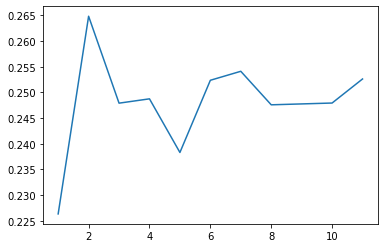

In [30]:
plt.plot(list(range(1, d_max)), [result[0] for result in results])

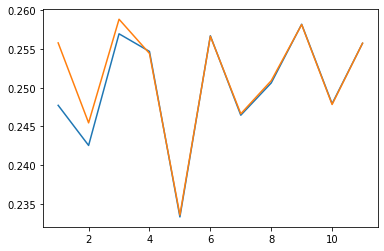

In [31]:
plt.plot(list(range(1, d_max)), [result[1] for result in results])
plt.plot(list(range(1, d_max)), [result[2] for result in results])
plt.show()

In [ ]:
%%time
sim = simulation(20, 1)

In [36]:
sim

[[(0.2523471473504899+0j), (0.062013479453961906-5.421010862427522e-20j)]]

In [ ]:
%%time
N = 20
d_max = 10
results = []
for d in range(d_max, d_max+5):
    sim = simulation(d, N)
    p_ps = np.mean([el[0] for el in sim])
    p_annealed = np.mean([el[1] for el in sim])/p_ps
    p_quenched = np.mean([el[1]/el[0] for el in sim])
    results.append([p_ps, p_annealed, p_quenched])

In [4]:
def psi_i2(d):
    psi = np.zeros(16*d**2)
    for j in range(2):
        ket_j = np.zeros(2)
        ket_j[j] = 1
        for k in range(d):
            ket_k = np.zeros(d)
            ket_k[k] = 1
            psi_j = np.kron(ket_k, ket_j)
            psi_j = np.kron(psi_j, bell(2))
            psi_j = np.kron(psi_j, ket_k)
            psi_j = np.kron(psi_j, ket_j)
            psi += psi_j/np.sqrt(2*d)
    psi = np.kron(bell(2), psi)
    return psi

def scrambler2(d):
    u = unitary_group.rvs(4*d)
    scrambler = np.kron(np.eye(2), u)
    scrambler = np.kron(scrambler, np.eye(2))
    scrambler = np.kron(scrambler, u.conj())
    return scrambler

def projector21(d):
    proj = np.zeros((16*d, 16*d))
    for n in range(2):
        ket_n = np.zeros(2)
        ket_n[n] = 1
        for m in range(2):
            ket_m = np.zeros(2)
            ket_m[m] = 1
            ket_n_bra_m = np.outer(ket_n, ket_m)
            proj_np = np.kron(ket_n_bra_m, np.eye(4*d))
            proj_np = np.kron(proj_np, ket_n_bra_m)
            proj += proj_np
    proj = np.kron(np.eye(4*d), proj)
    return proj/2

def projector22(d):
    proj = np.zeros((16*d, 16*d))
    for n in range(2):
        ket_n = np.zeros(2)
        ket_n[n] = 1
        for m in range(2):
            ket_m = np.zeros(2)
            ket_m[m] = 1
            ket_n_bra_m = np.outer(ket_n, ket_m)
            proj_np = np.kron(ket_n_bra_m, np.eye(4*d))
            proj_np = np.kron(proj_np, ket_n_bra_m)
            proj += proj_np
    proj = np.kron(proj, np.eye(4*d))
    return proj/2

def simulation2(d, N):
    psii = psi_i2(d)
    proj1 = projector21(d)
    proj2 = projector22(d)
    results = []
    for k in range(N):
        psif = proj1 @ scrambler2(d)  @ psii
        p_ps = psif.conj()@psif
        p_swap = psif.conj() @ proj2 @psif
        results.append([p_ps, p_swap])
    return results

In [5]:
%%time
N = 20
d_max = 10
results2 = []
for d in range(1, d_max):
    sim = simulation2(d, N)
    p_ps = np.mean([el[0] for el in sim])
    p_annealed = np.mean([el[1] for el in sim])/p_ps
    p_quenched = np.mean([el[1]/el[0] for el in sim])
    results2.append([p_ps, p_annealed, p_quenched])

CPU times: user 24min 16s, sys: 48.2 s, total: 25min 5s
Wall time: 3min 24s


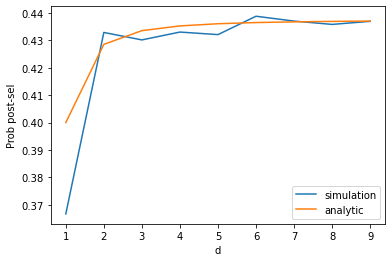

In [21]:
plt.plot(list(range(1, d_max)), [result[0] for result in results2], label='simulation')
plt.plot(list(range(1, d_max)), [(7*d**2-1)/(16*d**2-1) for d in range(1, d_max)], label='analytic')
plt.legend()
plt.xlabel("d") 
plt.ylabel("Prob post-sel") 
plt.show()

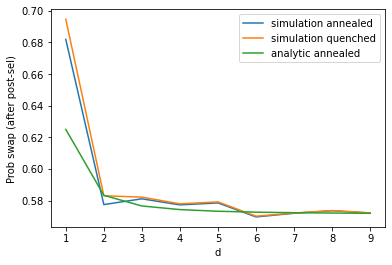

In [22]:
plt.plot(list(range(1, d_max)), [result[1] for result in results2], label='simulation annealed')
plt.plot(list(range(1, d_max)), [result[2] for result in results2], label='simulation quenched')
plt.plot(list(range(1, d_max)), [(16*d**2-1)/(7*d**2-1)/4 for d in range(1, d_max)], label='analytic annealed')
plt.xlabel("d") 
plt.ylabel("Prob swap (after post-sel)") 
plt.legend()
plt.show()

In [16]:
def messageU():
    return unitary_group.rvs(2)

def psi_i3(mU, d):
    psi = np.zeros(16*d**2)
    for j in range(2):
        ket_j = np.zeros(2)
        ket_j[j] = 1
        for k in range(d):
            ket_k = np.zeros(d)
            ket_k[k] = 1
            psi_j = np.kron(ket_k, ket_j)
            psi_j = np.kron(psi_j, bell(2))
            psi_j = np.kron(psi_j, ket_k)
            psi_j = np.kron(psi_j, ket_j)
            psi += psi_j/np.sqrt(2*d)
    psi_message = mU @ [1,0]
    psi = np.kron(psi_message, psi)
    return psi

def scrambler3(d):
    u = unitary_group.rvs(4*d)
    scrambler = np.kron(u, np.eye(2))
    scrambler = np.kron(scrambler, u.conj())
    return scrambler

def projector31(d):
    proj = np.zeros((16*d, 16*d))
    for n in range(2):
        ket_n = np.zeros(2)
        ket_n[n] = 1
        for m in range(2):
            ket_m = np.zeros(2)
            ket_m[m] = 1
            ket_n_bra_m = np.outer(ket_n, ket_m)
            proj_np = np.kron(ket_n_bra_m, np.eye(4*d))
            proj_np = np.kron(proj_np, ket_n_bra_m)
            proj += proj_np
    proj = np.kron(np.eye(2*d), proj)
    return proj/2

def projector32(d):
    proj = np.eye(4*d)
    ket_0 = np.array([1,0])
    ketbra_0 = np.outer(ket_0, ket_0)
    proj = np.kron(proj, ketbra_0)
    proj = np.kron(proj, np.eye(4*d))
    return proj

def decoder(mu, d):
    proj = np.eye(4*d)
    proj = np.kron(proj, mu.T.conj())
    proj = np.kron(proj, np.eye(4*d))
    return proj

def simulation3(d, N):
    mU = messageU() 
    psii = psi_i3(mU, d)
    proj1 = projector31(d)
    proj2 = projector32(d)
    dec = decoder(mU, d)
    results = []
    for k in range(N):
        psif = proj1 @ scrambler3(d)  @ psii
        p_ps = psif.conj()@psif
        psif_dec = dec @ psif
        p_swap = psif_dec.conj() @ proj2 @psif_dec
        results.append([p_ps, p_swap])
    return results

In [18]:
%%time
N = 20
d_max = 10
results3 = []
for d in range(1, d_max):
    sim = simulation3(d, N)
    p_ps = np.mean([el[0] for el in sim])
    p_annealed = np.mean([el[1] for el in sim])/p_ps
    p_quenched = np.mean([el[1]/el[0] for el in sim])
    results3.append([p_ps, p_annealed, p_quenched])

CPU times: user 3min 23s, sys: 5.79 s, total: 3min 29s
Wall time: 33.7 s


/Users/af_rotundo/miniforge3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


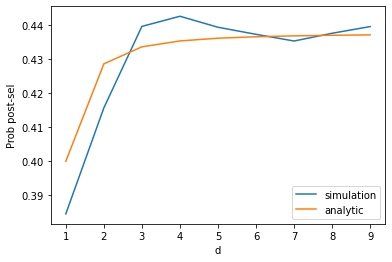

In [19]:
plt.plot(list(range(1, d_max)), [result[0] for result in results3], label='simulation')
plt.plot(list(range(1, d_max)), [(7*d**2-1)/(16*d**2-1) for d in range(1, d_max)], label='analytic')
plt.legend()
plt.xlabel("d") 
plt.ylabel("Prob post-sel") 
plt.show()

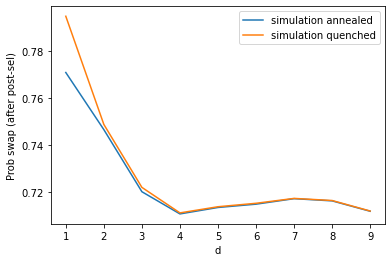

In [21]:
plt.plot(list(range(1, d_max)), [result[1] for result in results3], label='simulation annealed')
plt.plot(list(range(1, d_max)), [result[2] for result in results3], label='simulation quenched')
plt.xlabel("d") 
plt.ylabel("Prob swap (after post-sel)") 
plt.legend()
plt.show()